In [398]:
#This is one_max problem using DEAP

In [ ]:
@article{DEAP_JMLR2012, 
    author    = " F\'elix-Antoine Fortin and Fran\c{c}ois-Michel {De Rainville} and Marc-Andr\'e Gardner and Marc Parizeau and Christian Gagn\'e ",
    title     = { {DEAP}: Evolutionary Algorithms Made Easy },
    pages    = { 2171--2175 },
    volume    = { 13 },
    month     = { jul },
    year      = { 2012 },
    journal   = { Journal of Machine Learning Research }
}

In [399]:
import random
import matplotlib.pyplot as plt
from deap import base
from deap import creator
from deap import tools


In [400]:

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_bool", random.randint, 0, 1)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_bool, 10)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(onelist):
    return sum(onelist),####NOTE THERE IS A COMMA HERE!!!!!!
#IF YOU DO NOT PUT THE COMMA
####
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

MUTPB=0.1
CXPB=0.5

C:\Software\PythonAnaconda\envs\py36\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Software\PythonAnaconda\envs\py36\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


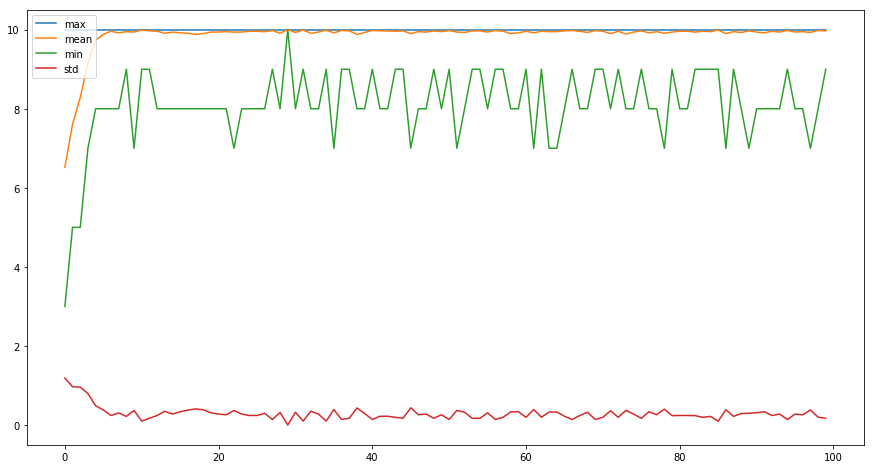

In [401]:
def main():
    pop1 = toolbox.population(n=100)
    fitnesses = list(map(toolbox.evaluate, pop1))
    for ind, fit in zip(pop1, fitnesses):
        ind.fitness.values = fit
    min_ls=[]
    max_ls=[]
    avg_ls=[]
    std_ls=[]
    x_list=range(100)
    fits=[ind.fitness.values[0] for ind in pop1]
    for i in range(100):
        pop2=toolbox.select(pop1,len(pop1))#tournment selection
        pop2=list(map(toolbox.clone,pop2))#get a copy of pop2, this is a fast way
        for child1, child2 in zip(pop2[::2],pop2[1::2]):#[1,3,5,...][2,4,6,...]
            if random.random()<CXPB:
                toolbox.mate(child1,child2)
                del child1.fitness.values
                del child2.fitness.values
        for mutant in pop2:
            if random.random()<MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values
        invalid_ind=[ind for ind in pop2 if not ind.fitness.valid]
        fitnesses=map(toolbox.evaluate, invalid_ind)
        for ind,fit in zip(invalid_ind,fitnesses):
            ind.fitness.values=fit
        pop1[:]=pop2
        fits=[ind.fitness.values[0] for ind in pop1]
        length = len(pop1)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        min_ls+=[min(fits)]
        max_ls+=[max(fits)]
        avg_ls+=[mean]
        std_ls+=[std]
    plt.figure(figsize=(15,8))
    plt.plot(x_list,max_ls,label='max')
    plt.plot(x_list,avg_ls,label='mean')
    plt.plot(x_list,min_ls,label='min')
    plt.plot(x_list,std_ls,label='std')
    plt.legend(loc='upper left')
    plt.show()

main()

In [30]:
# Knapsack Problem

In [424]:
NBR_ITEMS=20
WEIGHT_MAX=237
items={}
# (weight,value)
for i in range(NBR_ITEMS):
    items[i]=(random.randint(1,50),random.randint(1,100))


creator.create("FitnessMax", base.Fitness, weights=(1.0,))#This is a way of ranking
creator.create("Individual", list, fitness=creator.FitnessMax)

def randomPick():
    return list(sorted(random.sample(range(NBR_ITEMS),random.randint(1,NBR_ITEMS-1))))

def evalValueMax(ind):
    one_ind=ind[0]
    if len(one_ind)==0:
        return 0,
    value=sum([items[x][1] for x in one_ind])
    weight=sum([items[x][0] for x in one_ind])
    if weight>WEIGHT_MAX:
        return 0,
    return value,
def mutation(ind):
    one_ind=ind[0]
    index=random.randint(0,NBR_ITEMS-1)
    if index in one_ind:
        one_ind.remove(index)
    else:
        one_ind+=[index]
    return [sorted(one_ind)]
def crossover(a,b):
    father=a[0]
    mother=b[0]
    loc=random.randint(0,min(len(father),len(mother)))
    return ([father[:loc]+mother[loc:]],[mother[:loc]+father[loc:]])

toolbox = base.Toolbox()
toolbox.register("individual",creator.Individual,randomPick)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_bool", randomPick)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_bool, 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalValueMax)
toolbox.register("mutate",mutation)
toolbox.register("mate",crossover)
toolbox.register("select", tools.selTournament, tournsize=3)
bags=toolbox.population(5)
bags

C:\Software\PythonAnaconda\envs\py36\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Software\PythonAnaconda\envs\py36\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


[[[4, 8, 12, 13, 14, 15]],
 [[1, 2, 10, 12, 13, 14, 15, 16, 19]],
 [[2, 19]],
 [[5, 12, 17]],
 [[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 17, 19]]]

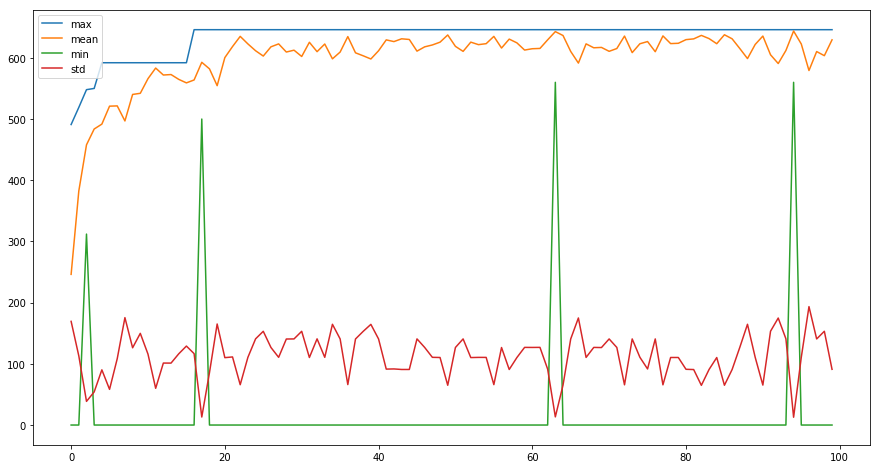

In [425]:
def main():
    pop1 = toolbox.population(n=100)
    fitnesses = list(map(toolbox.evaluate, pop1))
    for ind, fit in zip(pop1, fitnesses):
        ind.fitness.values = fit
    min_ls=[]
    max_ls=[]
    avg_ls=[]
    std_ls=[]
    x_list=range(100)
    fits=[ind.fitness.values[0] for ind in pop1]
    for i in range(100):
        pop2=toolbox.select(pop1,len(pop1))#tournment selection
        pop2=list(map(toolbox.clone,pop2))#get a copy of pop2, this is a fast way
        for child1, child2 in zip(pop2[::2],pop2[1::2]):#[1,3,5,...][2,4,6,...]
            if random.random()<CXPB:
                toolbox.mate(child1,child2)
                del child1.fitness.values
                del child2.fitness.values
        for mutant in pop2:
            if random.random()<MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values
        invalid_ind=[ind for ind in pop2 if not ind.fitness.valid]
        fitnesses=map(toolbox.evaluate, invalid_ind)
        for ind,fit in zip(invalid_ind,fitnesses):
            ind.fitness.values=fit
        pop1[:]=pop2
        fits=[ind.fitness.values[0] for ind in pop1]
        length = len(pop1)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        min_ls+=[min(fits)]
        max_ls+=[max(fits)]
        avg_ls+=[mean]
        std_ls+=[std]
    plt.figure(figsize=(15,8))
    plt.plot(x_list,max_ls,label='max')
    plt.plot(x_list,avg_ls,label='mean')
    plt.plot(x_list,min_ls,label='min')
    plt.plot(x_list,std_ls,label='std')
    plt.legend(loc='upper left')
    plt.show()

main()